In [132]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [133]:
mpga = pd.read_csv("auto-mpg.csv", encoding = "unicode escape")
mpga

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [134]:
mpga.duplicated().sum()

0

In [135]:
mpga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [136]:
mpga.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### Data Cleaning

In [137]:
mpga = mpga[mpga["horsepower"]!="?"]

In [138]:
(mpga["horsepower"]=="?").sum()

0

In [139]:
mpga["horsepower"] = mpga["horsepower"].astype("int")

In [140]:
mpga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [141]:
mpga["origin"] = mpga["origin"].replace({1:"USA",2:"Europe", 3 : "Asia"})

In [142]:
mpga["origin"] = mpga["origin"].astype("category")

In [143]:
mpga.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


### Data Visualisation

In [149]:
mpga1 = mpga.select_dtypes(include= np.number)

In [148]:
mpga1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


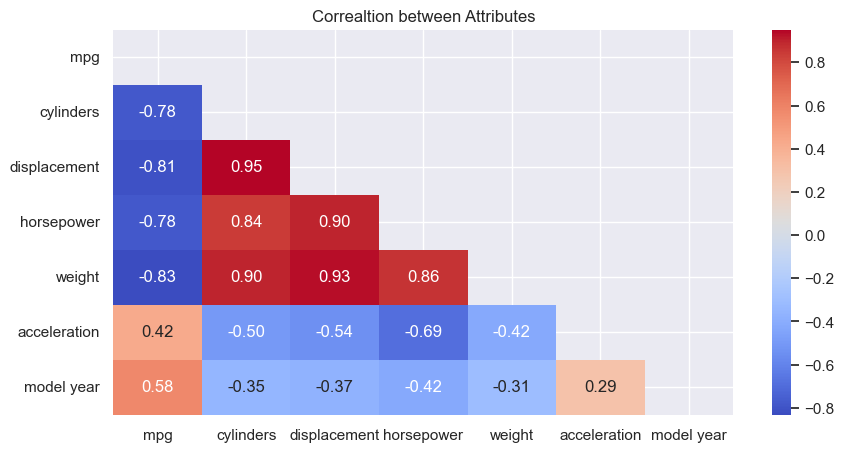

In [152]:
sb.set(rc = {"figure.figsize" : (10,5)})
corr = mpga1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sb.heatmap(corr, annot=True, fmt=".2f",mask = mask, cmap="coolwarm")
plt.title("Correaltion between Attributes")
plt.show()

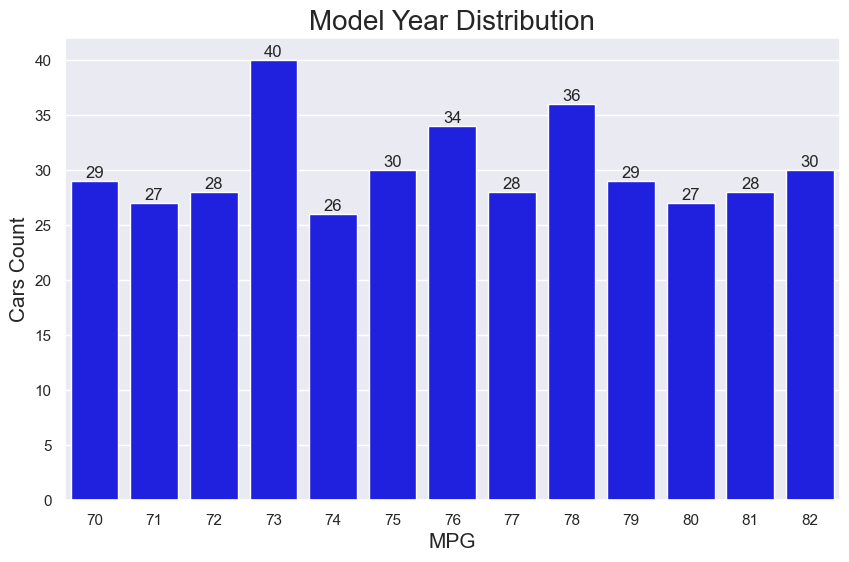

In [163]:
plt.figure(figsize=(10,6))
ax = sb.countplot(data = mpga, x= "model year", color ="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Model Year Distribution", fontsize = 20)
plt.xlabel("MPG", fontsize = 15)
plt.ylabel("Cars Count", fontsize = 15)
plt.show()


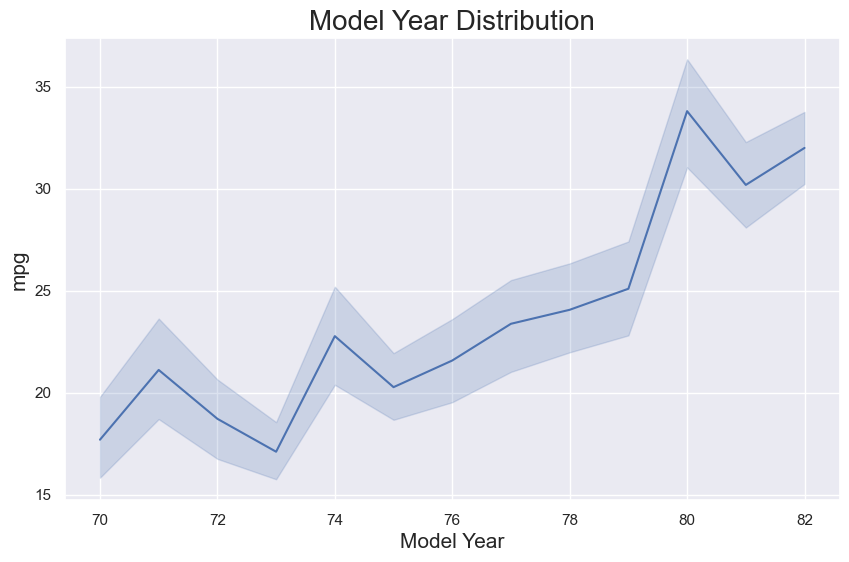

In [154]:
plt.figure(figsize=(10,6))
sb.lineplot(data = mpga, x= "model year",y = "mpg")
plt.title("Model Year Distribution", fontsize = 20)
plt.xlabel("Model Year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

In [157]:
#From the above visualizations, we we may totice the following:
#-- Our dataset contains info about cars from 1970 to 1982.
#-- Most of the cars are produced in `1973`.
#-- As years pass after `1973`, there has been a noticable increase in `mpg`.

In [158]:
mpga.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [174]:
#taking closer look to mpg and cylinder

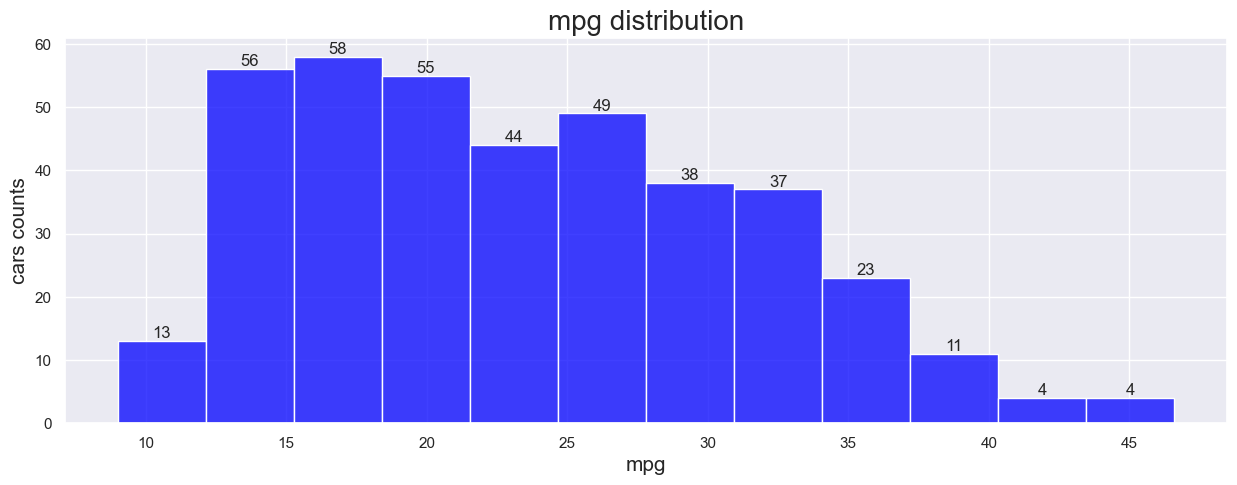

In [180]:
sb.set(rc = {"figure.figsize" : (15,5)})
aw = sb.histplot(data = mpga, x = "mpg",color = "blue")
for bars in aw.containers:
    aw.bar_label(bars)
plt.title("mpg distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars counts", fontsize = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

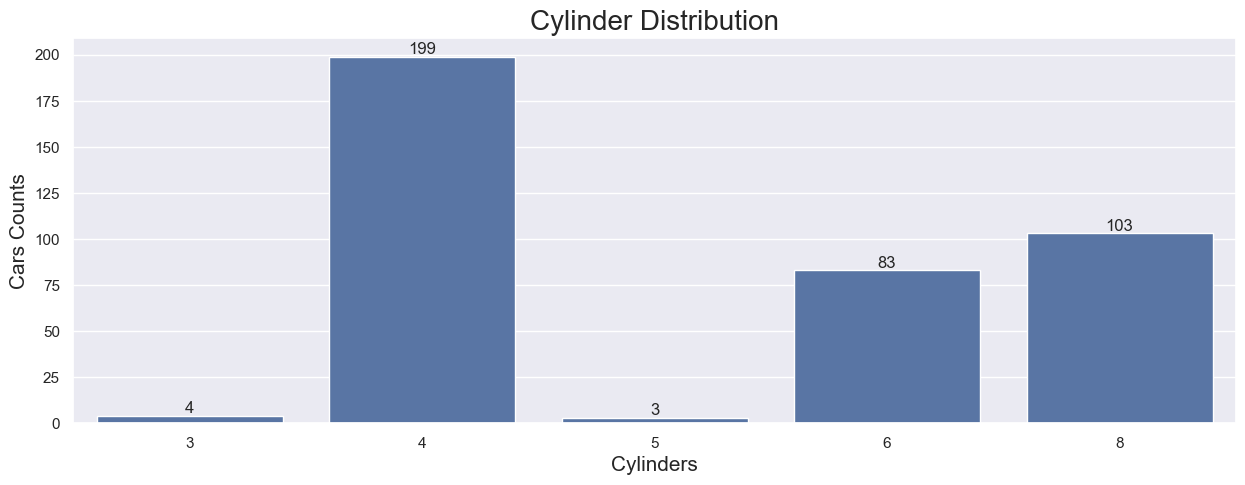

In [178]:
plt.figure(figsize=(15,5))
aq = sb.countplot(data = mpga, x = "cylinders")
for bars in aq.containers:
    aq.bar_label(bars)
plt.title("Cylinder Distribution", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("Cars Counts", fontsize = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

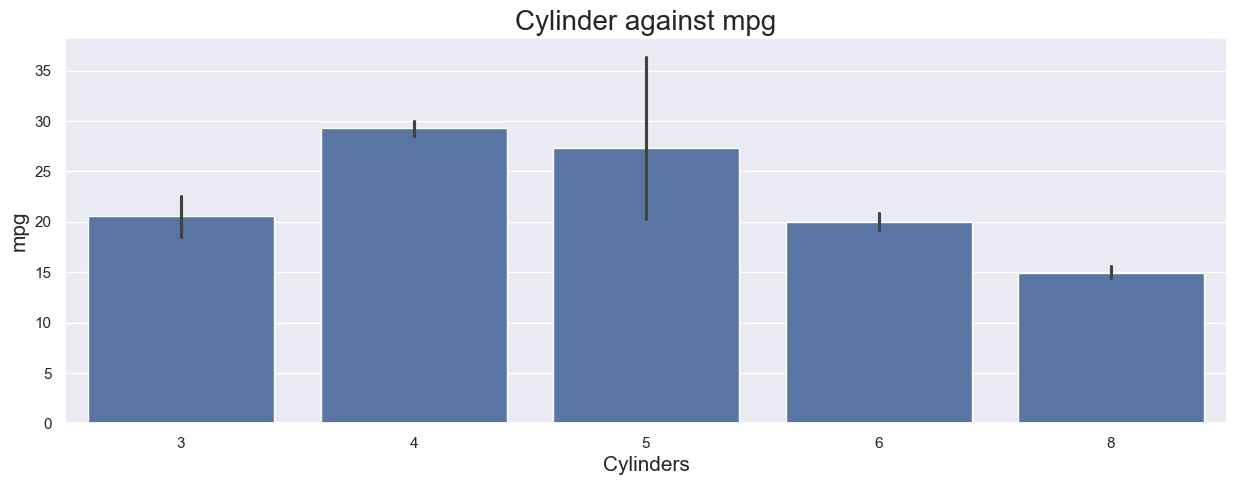

In [184]:
plt.figure(figsize=(15,5))
sb.barplot(data = mpga, x = "cylinders", y = "mpg")
plt.title("Cylinder against mpg", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

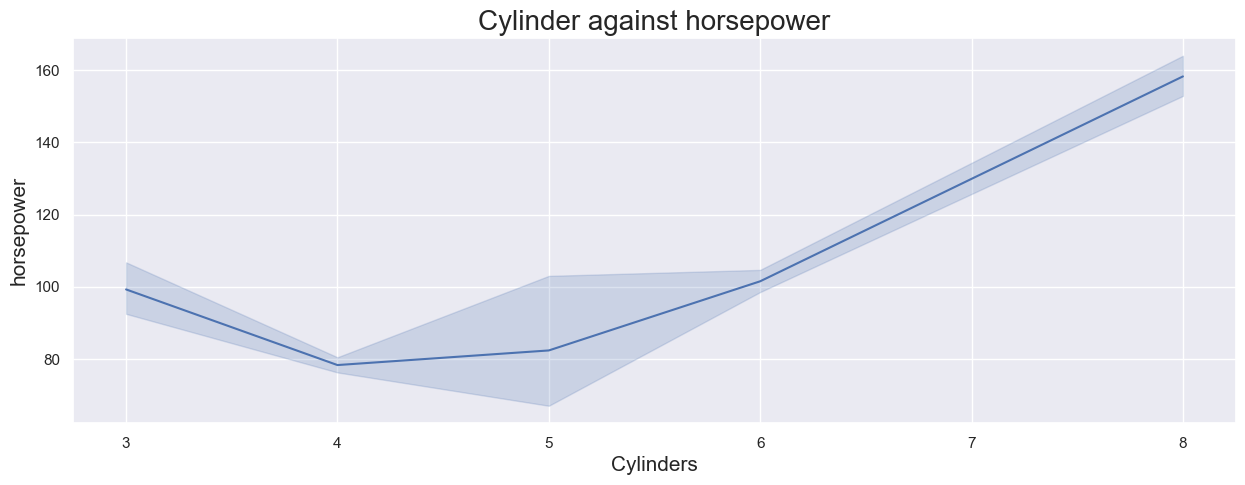

In [185]:
plt.figure(figsize=(15,5))
sb.lineplot(data = mpga, x = "cylinders", y = "horsepower")
plt.title("Cylinder against horsepower", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

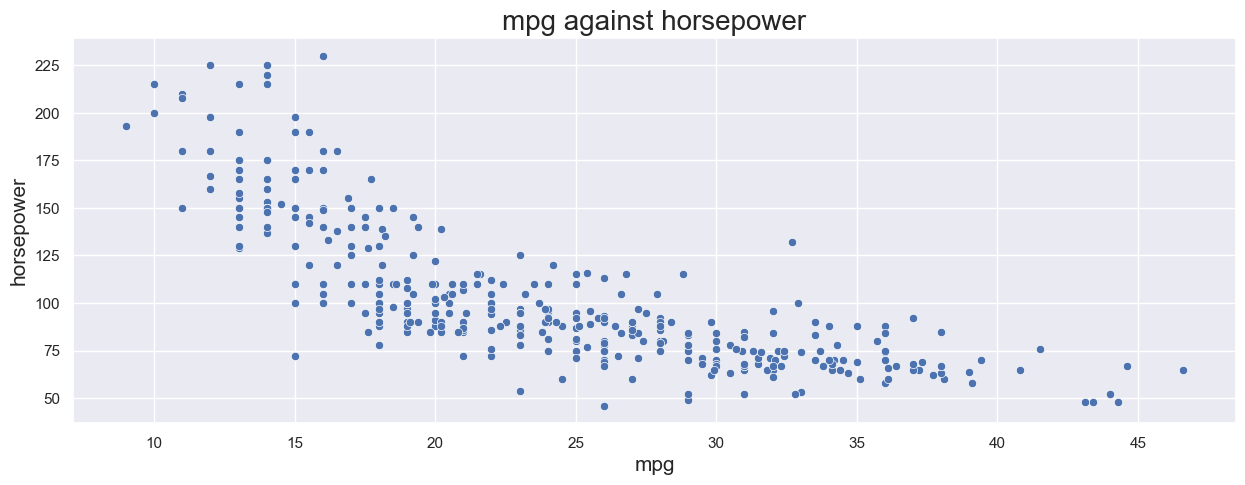

In [186]:
plt.figure(figsize=(15,5))
sb.scatterplot(data = mpga, x = "mpg", y = "horsepower")
plt.title("mpg against horsepower", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show

In [187]:
#From the above visuals, we can notice that:
#- As `cylinders` in the engine increases above 4, `MPG` decreases.
#- As `cylinders` in the engine increases above 4, engine `horsepower` increases.
#- there is negative correlation between `mpg` and `horsepower`.

In [188]:
mpga.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

### origin  against mpg and horsepower

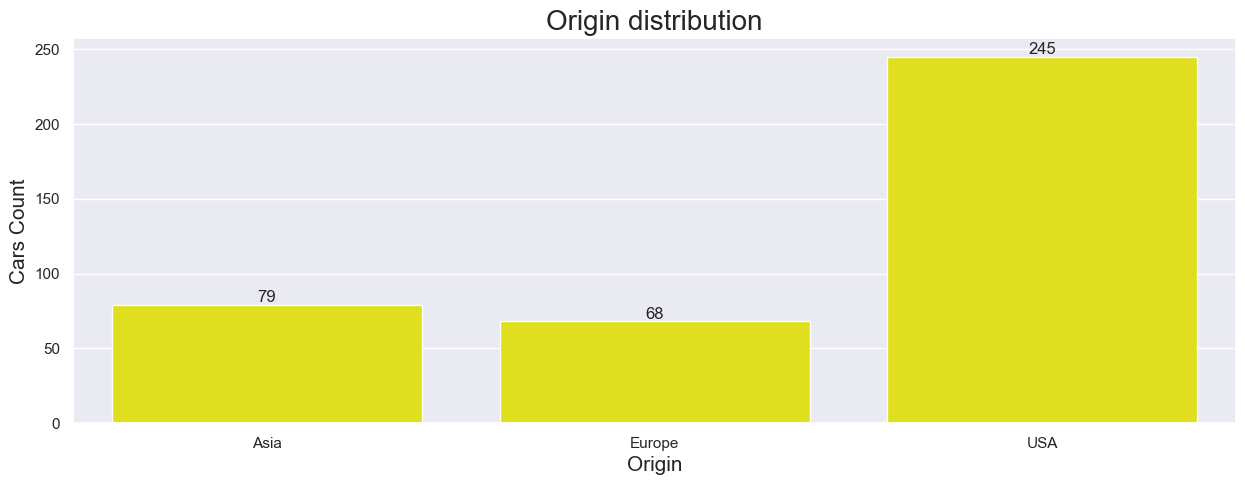

In [190]:
sb.set(rc = {"figure.figsize" : (15,5)})
aqa = sb.countplot(data= mpga, x = "origin",color = "yellow")
for bars in aqa.containers:
    aqa.bar_label(bars)
plt.title("Origin distribution", fontsize = 20)
plt.xlabel("Origin", fontsize = 15)
plt.ylabel("Cars Count", fontsize = 15)
plt.show()

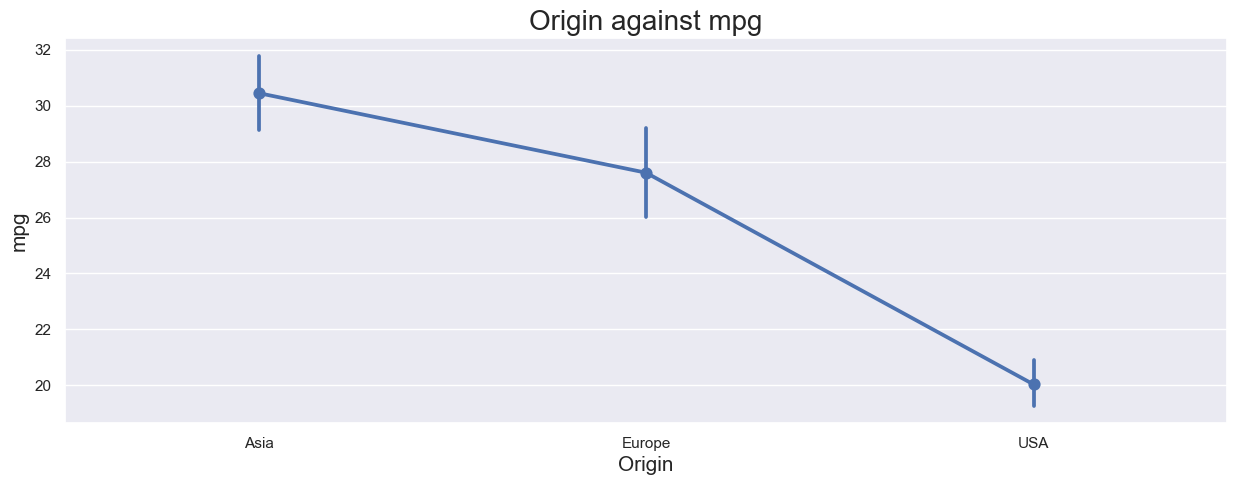

In [192]:
sb.set(rc = {"figure.figsize" : (15,5)})
aqa = sb.pointplot(data= mpga, x = "origin", y = "mpg",)
plt.title("Origin against mpg", fontsize = 20)
plt.xlabel("Origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

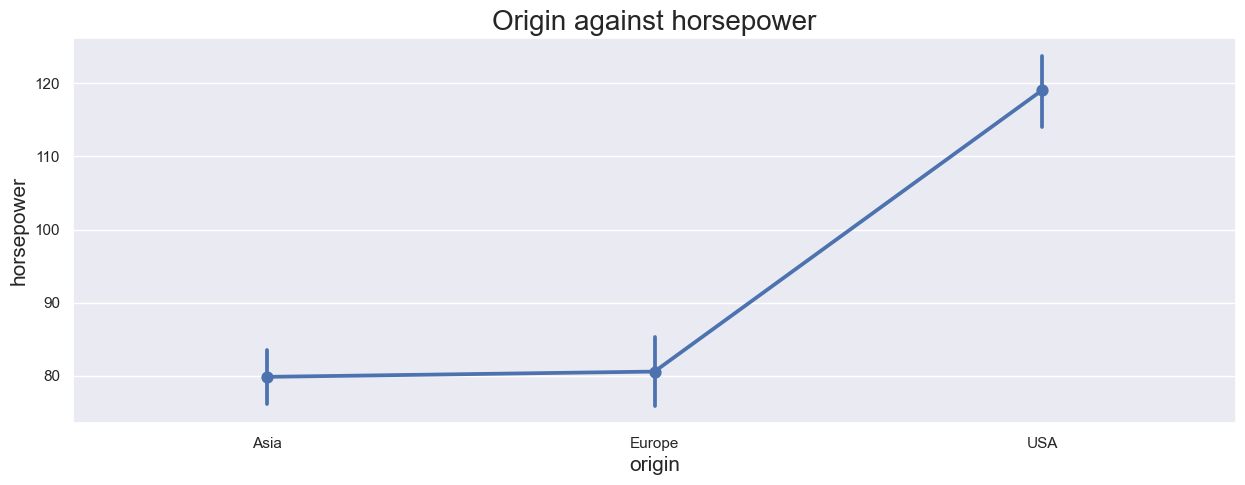

In [197]:
sb.set(rc = {"figure.figsize" : (15,5)})
sb.pointplot(data= mpga, x = "origin", y = "horsepower",)
plt.title("Origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

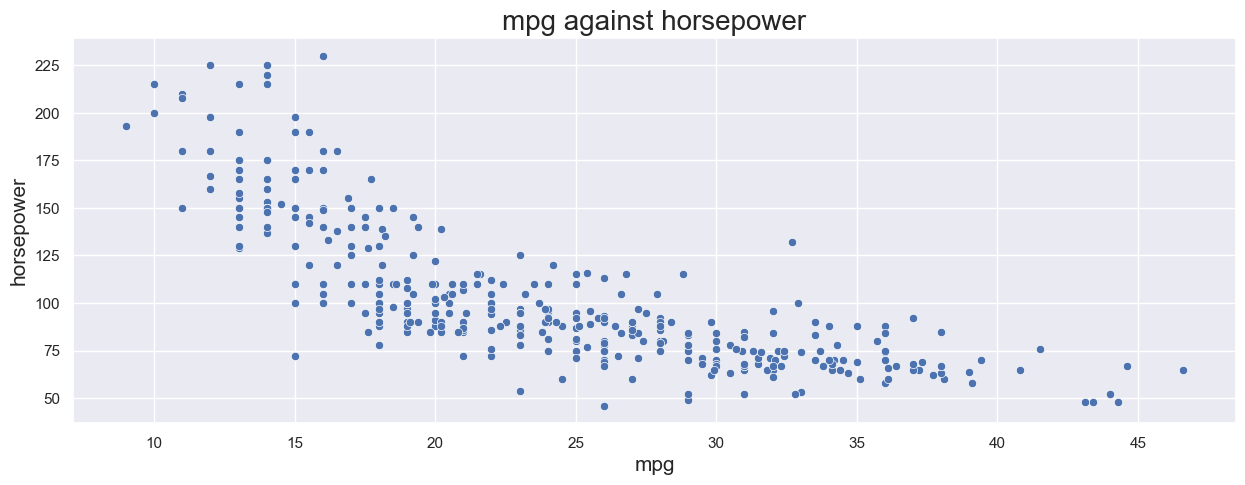

In [198]:
sb.set(rc = {"figure.figsize" : (15,5)})
sb.scatterplot(data= mpga, x = "mpg", y = "horsepower",)
plt.title("mpg against horsepower", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

In [199]:
#- As expected, `USA` has the highest engine `horsepower`. This implies the previously observed conclusion that `hoursepower` and `mpg` has a negative correlation.

### model year against mpg with respect to origin

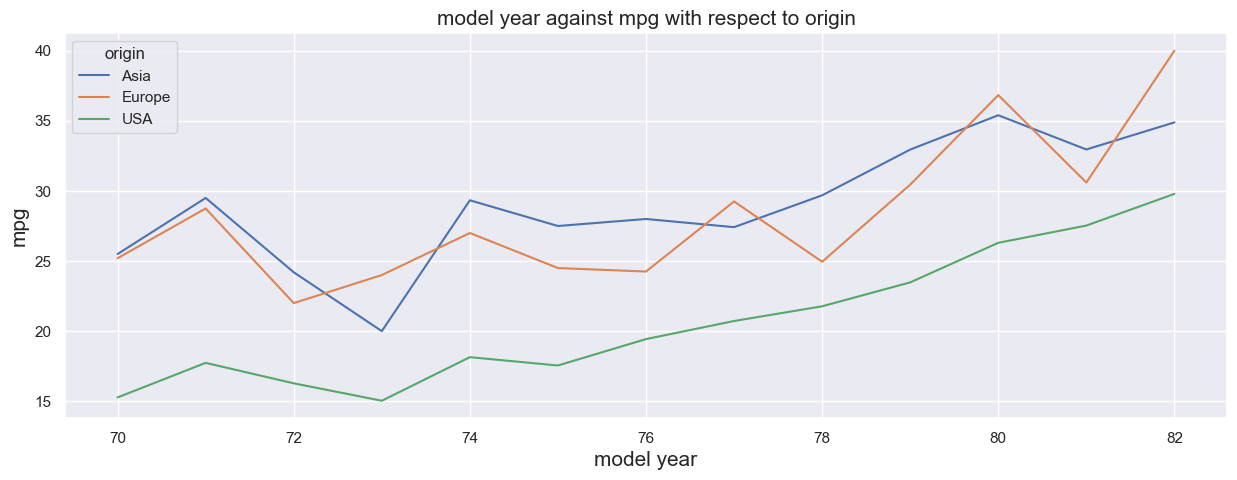

In [203]:
plt.figure(figsize= (15,5))
sb.lineplot(data = mpga, x = "model year", hue = "origin", y = "mpg", ci= None)
plt.title("model year against mpg with respect to origin", fontsize = 15)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

In [206]:
#This chart also implies the positive correlation between `model year` and `mpg`, and shows that `Asia` has been leading country in this industry, 
# followed by `Europe` and `USA` comes in the last place.

### Let's now explore how `weight` has been affecting our car specs over the years.

In [211]:
mpga.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

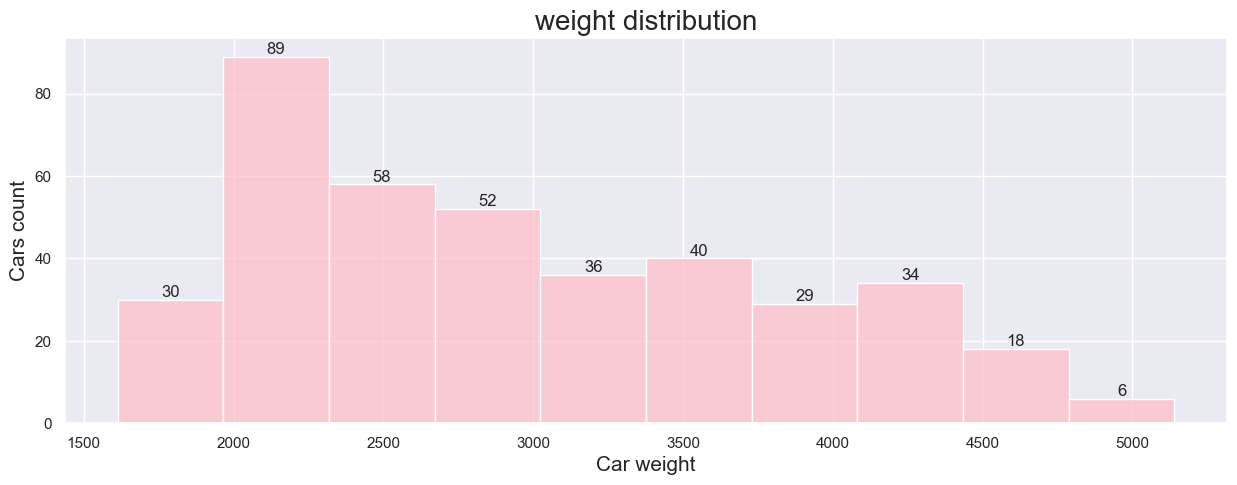

In [214]:
sb.set(rc = {"figure.figsize" :(15,5)})
az = sb.histplot(data = mpga, x= "weight", color = "pink")
for bars in az.containers:
    az.bar_label(bars)
plt.title("weight distribution", fontsize = 20)
plt.xlabel("Car weight", fontsize = 15)
plt.ylabel("Cars count", fontsize = 15)
plt.show()

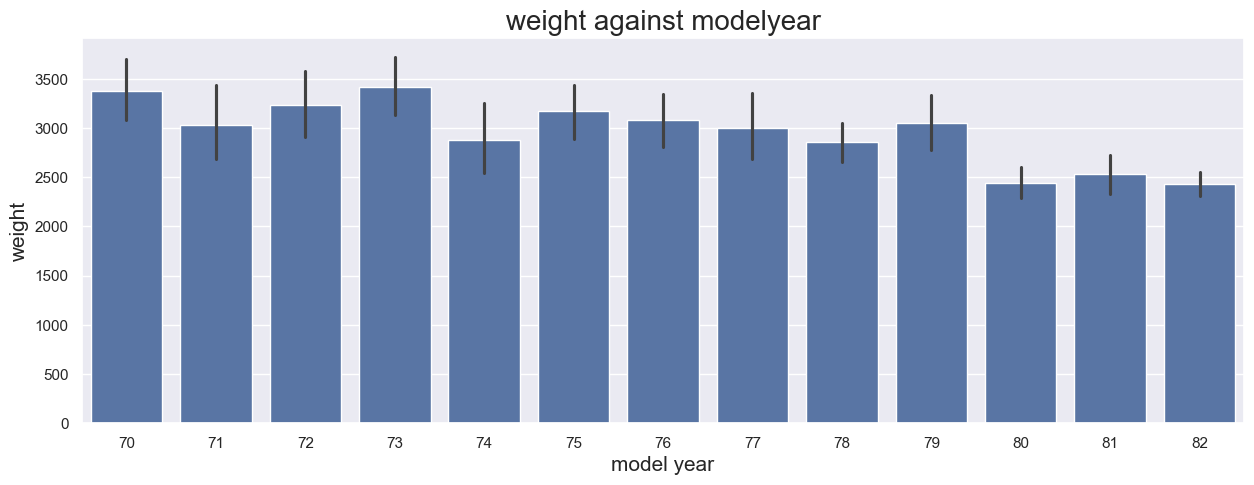

In [217]:
sb.set(rc = {"figure.figsize" :(15,5)})
az = sb.barplot(data = mpga, y= "weight", x = "model year",)
plt.title("weight against modelyear", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

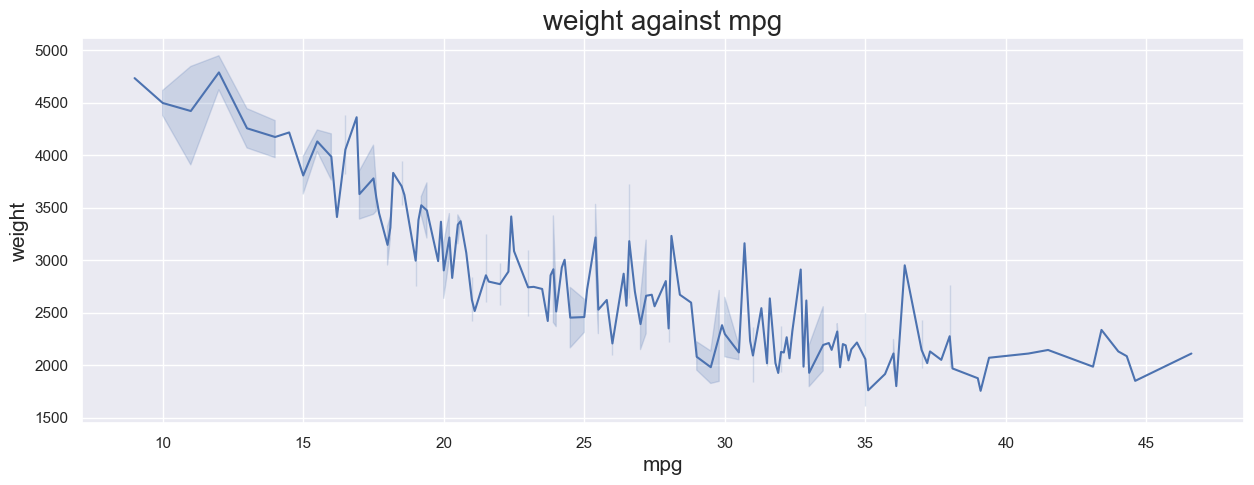

In [222]:
sb.set(rc = {"figure.figsize" :(15,5)})
az = sb.lineplot(data = mpga, y= "weight", x = "mpg",)
plt.title("weight against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

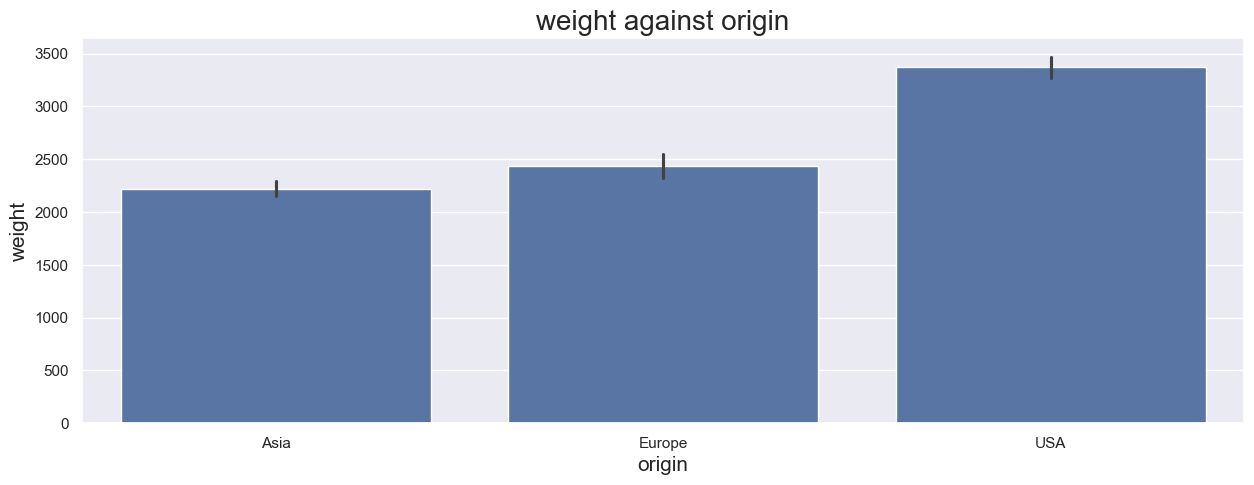

In [224]:
sb.set(rc = {"figure.figsize" :(15,5)})
az = sb.barplot(data = mpga, x = "origin", y = "weight",)
plt.title("weight against origin", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [225]:
#- As expected, `USA` gets the highest possible `weight` values, that explains alot about its low `mpg` and high `horsepower`.
#- `Asia` produces the lightest cars campared to `USA` and `Europe`, this also explains itss high `mpg` and low `horsepower`.

### Let's take a final look at `acceleration` column, and how it is related to `horsepower` and `mpg` to get a better understanding of our findings.

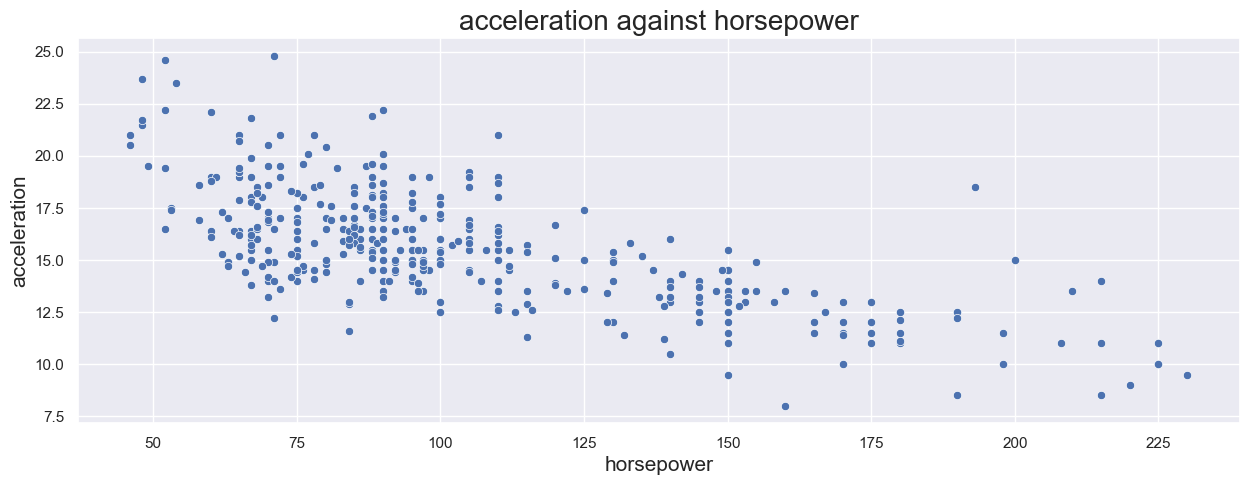

In [226]:
sb.set(rc = {"figure.figsize" :(15,5)})
az = sb.scatterplot(data = mpga, x = "horsepower", y = "acceleration",)
plt.title("acceleration against horsepower", fontsize = 20)
plt.xlabel("horsepower", fontsize = 15)
plt.ylabel("acceleration", fontsize = 15)
plt.show()

In [227]:
#- Wa can spot a negative correlation between `acceleration` and `horepower`, this means that it has a positive one with `mpg`.


In [229]:
## Conclusion
#In this section, we'd add the conclusions we draw from the previous visualisations.
#- As years pass after `1973`, there has been a noticable increase in `mpg`.
#- As `cylinders` in the engine increases above 4, `MPG` decreases and engine `horsepower` increases. That indicates negative correlation between `mpg` and `horsepower`.
#- `mpg` increases as `weight` decreses over time, that also indecates a stron correlation between them.
#- Althogh `USA` has the biggest count of produced cars, its cars has relatively very low `mpg`, thus the highest possible `weight` compared to `Asia` and `Europe`
#- `Asia` is the leading contry in producing cars with high `mpg` with a mean close to 30, and it produces the lightest cars
#- Wa can spot a negative correlation between `acceleration` and `horepower`, this means that it has a positive one with `mpg`.